# Import tools and import csv file as dataframe

In [1]:
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

df = pd.read_csv('Apartment Building Evaluation.csv')

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


# find shape of dataframe

In [2]:
df.shape

(9633, 40)

# List top few samples in our dataset

In [3]:
df.head()

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,720143,4155231,2017.0,2021,1950.0,PRIVATE,3,Etobicoke-Lakeshore,3 HEATHERDALE RD,4,...,4.0,5.0,3.0,NaN,NaN,W0329,43.634802,-79.491225,305492.372,4832539.503
1,720144,4155028,2017.0,2021,1968.0,PRIVATE,12,Toronto-St. Paul's,620 NORTHCLIFFE BLVD,9,...,4.0,5.0,4.0,4.0,NaN,S1222,43.693555,-79.447287,309033.655,4839067.943
2,720145,4155260,2017.0,2021,1956.0,PRIVATE,3,Etobicoke-Lakeshore,4 CROWN HILL PL,5,...,4.0,4.0,4.0,NaN,NaN,W0327,43.637948,-79.490746,305531.020,4832889.053
3,720146,4155265,2017.0,2021,1955.0,PRIVATE,3,Etobicoke-Lakeshore,9 CROWN HILL PL,5,...,4.0,5.0,2.0,NaN,NaN,W0327,43.639623,-79.491058,305505.524,4833076.116
4,720147,4153425,2017.0,2021,1900.0,SOCIAL HOUSING,13,Toronto Centre,244 CHURCH ST,3,...,4.0,NaN,4.0,NaN,4.0,S1332,43.655963,-79.377259,314684.790,4834897.546


# Find how many different wards in out dataset

In [4]:
len(df['WARDNAME'].unique())

25

# Find what are the name of these wards

In [5]:
df['WARDNAME'].unique()

array(['Etobicoke-Lakeshore', "Toronto-St. Paul's", 'Toronto Centre',
       'Davenport', 'Don Valley West', 'Etobicoke North',
       'Parkdale-High Park', 'Don Valley East', 'York South-Weston',
       'University-Rosedale', 'Eglinton-Lawrence', 'York Centre',
       'Beaches-East York', 'Etobicoke Centre', 'Toronto-Danforth',
       'Humber River-Black Creek', 'Scarborough-Agincourt',
       'Spadina-Fort York', 'Scarborough-Guildwood', 'Don Valley North',
       'Willowdale', 'Scarborough-Rouge Park', 'Scarborough Southwest',
       'Scarborough Centre', 'Scarborough North'], dtype=object)

# Find information about scores for future use

In [6]:
df['SCORE'].describe()

count    9633.000000
mean       72.255891
std        10.075289
min         0.000000
25%        65.000000
50%        73.000000
75%        79.000000
max       100.000000
Name: SCORE, dtype: float64

# The minimun of the score is 0

In [7]:
df['SCORE'].min()

0

# Find which sample has the score 0

In [8]:
df.loc[df['SCORE']==0]

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
6234,726377,4155384,2017.0,2017,1950.0,PRIVATE,2,Etobicoke Centre,339 THE WEST MALL,5,...,NaN,NaN,NaN,NaN,NaN,W0233,43.638069,-79.563941,299625.092,4832905.27


# Since the evaluation of this sample is all NaN we drop it

In [9]:
df = df.drop([6234])

# Find the describe information again

In [10]:
df['SCORE'].describe()

count    9632.000000
mean       72.263393
std        10.048872
min        20.000000
25%        65.000000
50%        73.000000
75%        79.000000
max       100.000000
Name: SCORE, dtype: float64

# Find the apartment with minimun score, 20

In [11]:
df.loc[df['SCORE']==20].T

,1021
_id,721164
RSN,4153710
YEAR_REGISTERED,2017.0
YEAR_EVALUATED,2021
YEAR_BUILT,1910.0
PROPERTY_TYPE,PRIVATE
WARD,19
WARDNAME,Beaches-East York
SITE_ADDRESS,2 MAIN ST
CONFIRMED_STOREYS,3


# Create a data series with index = wardname and column = score, find the average score for each ward

In [12]:
avg_score_ward = df.groupby(['WARDNAME'])['SCORE'].mean().sort_values()
avg_score_ward

WARDNAME
Davenport                   68.449580
Humber River-Black Creek    68.690402
Parkdale-High Park          69.015598
Etobicoke North             69.239837
York South-Weston           70.278711
York Centre                 70.933934
Etobicoke-Lakeshore         71.387374
Scarborough-Guildwood       71.529412
University-Rosedale         71.582677
Scarborough Southwest       71.740566
Toronto Centre              71.783242
Eglinton-Lawrence           72.031294
Etobicoke Centre            72.159780
Beaches-East York           72.409563
Toronto-Danforth            72.660714
Toronto-St. Paul's          73.570806
Scarborough Centre          74.401617
Scarborough-Rouge Park      75.054795
Spadina-Fort York           75.297521
Don Valley East             76.293427
Don Valley West             76.681716
Willowdale                  76.721739
Scarborough-Agincourt       78.019802
Don Valley North            79.193103
Scarborough North           80.882353
Name: SCORE, dtype: float64

# Find the lowest average score

In [13]:
avg_score_ward.min()

68.44957983193277

# Change the sries into dataframe so that plot.barh() can read it

In [14]:
avg_df = avg_score_ward.to_frame( )
avg_df

,SCORE
WARDNAME,
Davenport,68.449580
Humber River-Black Creek,68.690402
Parkdale-High Park,69.015598
Etobicoke North,69.239837
York South-Weston,70.278711
York Centre,70.933934
Etobicoke-Lakeshore,71.387374
Scarborough-Guildwood,71.529412
University-Rosedale,71.582677


# Create a barh chart to show the relationship between average score and each wards

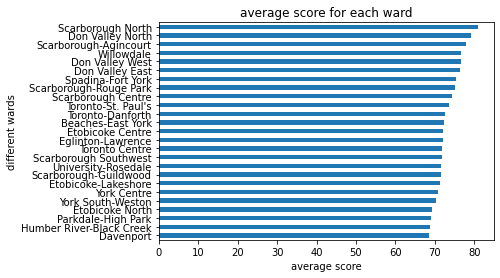

In [15]:
avg_score_ward.sort_values().plot.barh()
plt.xlabel('average score')
plt.ylabel('different wards')
plt.title('average score for each ward');

# Try to find some wards with lower score, in this step we take first 25 percentile

In [16]:
df.loc[df['SCORE']<=df['SCORE'].quantile(0.25)]

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
25,720168,4155591,2017.0,2021,1968.0,TCHC,9,Davenport,61 PELHAM PARK GDNS,17,...,3.0,3.0,3.0,3.0,3.0,S0926,43.669260,-79.457796,308187.607,4836369.289
33,720176,4155450,2017.0,2021,1976.0,PRIVATE,1,Etobicoke North,50 PANORAMA CRT,19,...,1.0,2.0,2.0,1.0,NaN,W0124,43.748168,-79.577118,298573.714,4845136.771
34,720177,4155666,2017.0,2021,1974.0,PRIVATE,1,Etobicoke North,46 PANORAMA CRT,19,...,1.0,3.0,2.0,2.0,NaN,W0124,43.748230,-79.578339,298475.409,4845143.751
46,720189,4326877,2018.0,2021,1927.0,PRIVATE,11,University-Rosedale,828 SHAW ST,3,...,3.0,NaN,3.0,NaN,NaN,S1124,43.664714,-79.424461,310876.572,4835865.230
54,720197,4154857,2017.0,2021,1962.0,PRIVATE,16,Don Valley East,80 BARTLEY DR,3,...,3.0,NaN,2.0,3.0,NaN,N1631,43.722615,-79.306620,320365.066,4842314.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,729757,4154333,2017.0,2017,1970.0,PRIVATE,5,York South-Weston,1855 JANE ST,17,...,3.0,4.0,3.0,2.0,3.0,W0528,43.708112,-79.504458,304425.229,4840683.807
9615,729758,4153165,2017.0,2017,1928.0,PRIVATE,9,Davenport,1019 BLOOR ST W,3,...,2.0,2.0,3.0,3.0,NaN,S0934,43.660630,-79.430840,310362.521,4835410.997
9618,729761,4154280,2017.0,2017,1966.0,PRIVATE,5,York South-Weston,11 GULLIVER RD,6,...,3.0,3.0,3.0,4.0,NaN,W0529,43.698830,-79.476216,306701.520,4839652.882
9620,729763,4155005,2017.0,2017,1955.0,PRIVATE,12,Toronto-St. Paul's,1071 EGLINTON AVE W,3,...,4.0,NaN,3.0,4.0,NaN,S1224,43.698824,-79.434351,310075.950,4839654.014


# Create a data series of wards lower than 65 (25 percentile of the score)

In [17]:
low_score = df.loc[df['SCORE']<=df['SCORE'].quantile(0.25)]['WARDNAME']

# List the series

In [18]:
low_score

25                     Davenport
33               Etobicoke North
34               Etobicoke North
46           University-Rosedale
54               Don Valley East
                  ...           
9614           York South-Weston
9615                   Davenport
9618           York South-Weston
9620          Toronto-St. Paul's
9628    Humber River-Black Creek
Name: WARDNAME, Length: 2587, dtype: object

# Find how many apartments is lower than 65

In [19]:
len(low_score)

2587

# For each ward, how many apartments have the score lower than 65

In [20]:
low_score.value_counts()

York South-Weston           248
Eglinton-Lawrence           213
Parkdale-High Park          213
Etobicoke-Lakeshore         198
Toronto-St. Paul's          193
York Centre                 188
Toronto Centre              162
Humber River-Black Creek    124
Scarborough Southwest       121
University-Rosedale         118
Beaches-East York           109
Etobicoke Centre            100
Davenport                    96
Toronto-Danforth             92
Etobicoke North              83
Don Valley East              68
Scarborough Centre           68
Scarborough-Guildwood        60
Don Valley West              54
Willowdale                   23
Spadina-Fort York            20
Don Valley North             15
Scarborough-Agincourt        11
Scarborough-Rouge Park        9
Scarborough North             1
Name: WARDNAME, dtype: int64

# Create a bar chart which x represent how many apartment and y is the name of different wards

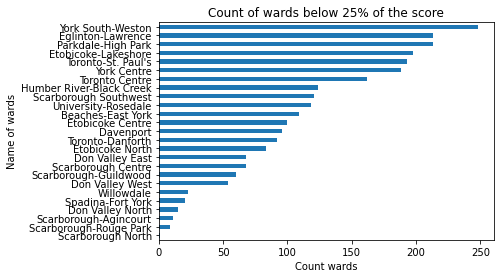

In [21]:
low_score.value_counts().sort_values().plot.barh()
plt.xlabel('Count wards')
plt.ylabel('Name of wards')
plt.title('Count of wards below 25% of the score');

# Find which apartment is below the mean score

In [22]:
df.loc[df['SCORE']<=df['SCORE'].mean()]

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
25,720168,4155591,2017.0,2021,1968.0,TCHC,9,Davenport,61 PELHAM PARK GDNS,17,...,3.0,3.0,3.0,3.0,3.0,S0926,43.669260,-79.457796,308187.607,4836369.289
26,720169,4153178,2017.0,2021,1919.0,PRIVATE,11,University-Rosedale,334 BLOOR ST W,3,...,3.0,NaN,3.0,NaN,NaN,S1126,43.666839,-79.404253,312505.959,4836102.924
33,720176,4155450,2017.0,2021,1976.0,PRIVATE,1,Etobicoke North,50 PANORAMA CRT,19,...,1.0,2.0,2.0,1.0,NaN,W0124,43.748168,-79.577118,298573.714,4845136.771
34,720177,4155666,2017.0,2021,1974.0,PRIVATE,1,Etobicoke North,46 PANORAMA CRT,19,...,1.0,3.0,2.0,2.0,NaN,W0124,43.748230,-79.578339,298475.409,4845143.751
35,720178,4154636,NaN,2021,1958.0,PRIVATE,6,York Centre,15 WILMINGTON AVE,3,...,4.0,3.0,3.0,3.0,NaN,N0624,43.753422,-79.452059,308645.309,4845718.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,729770,4154249,2017.0,2017,1966.0,PRIVATE,7,Humber River-Black Creek,10 JAYZEL DR,7,...,3.0,3.0,3.0,3.0,NaN,W0727,43.749340,-79.549430,300803.693,4845265.279
9628,729771,4154262,2017.0,2017,1977.0,PRIVATE,7,Humber River-Black Creek,10 SAN ROMANOWAY,34,...,3.0,3.0,3.0,4.0,NaN,W0725,43.758540,-79.516681,303441.401,4846286.246
9629,729772,4154780,2017.0,2017,1960.0,PRIVATE,16,Don Valley East,1063 DON MILLS RD,4,...,3.0,2.0,2.0,4.0,NaN,N1627,43.735515,-79.342345,317484.175,4843740.129
9631,729774,4155086,2017.0,2017,1955.0,PRIVATE,5,York South-Weston,1720 KEELE ST,4,...,4.0,4.0,3.0,5.0,NaN,W0536,43.685203,-79.473617,306911.453,4838139.002


# Find how many apartment is below the mean score

In [23]:
len(df.loc[df['SCORE']<=df['SCORE'].mean()])

4788

# Find how many apartments in each ward

In [24]:
df['WARDNAME'].value_counts()

Toronto-St. Paul's          918
York South-Weston           714
Eglinton-Lawrence           703
Etobicoke-Lakeshore         697
York Centre                 666
Parkdale-High Park          577
Toronto Centre              549
Beaches-East York           481
Don Valley West             443
Don Valley East             426
Scarborough Southwest       424
University-Rosedale         381
Scarborough Centre          371
Etobicoke Centre            363
Toronto-Danforth            336
Humber River-Black Creek    323
Etobicoke North             246
Davenport                   238
Scarborough-Guildwood       204
Don Valley North            145
Spadina-Fort York           121
Willowdale                  115
Scarborough-Agincourt       101
Scarborough-Rouge Park       73
Scarborough North            17
Name: WARDNAME, dtype: int64